# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | murgab
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | los llanos de aridane
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | rosetta
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | isla mujeres
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of

Processing Record 37 of Set 4 | ribeira grande
Processing Record 38 of Set 4 | aiquile
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | maragogi
Processing Record 42 of Set 4 | itarema
Processing Record 43 of Set 4 | batagay-alyta
Processing Record 44 of Set 4 | tura
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | afonso claudio
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | hami
Processing Record 49 of Set 4 | westport
Processing Record 0 of Set 5 | raga
City not found. Skipping...
Processing Record 1 of Set 5 | saldanha
Processing Record 2 of Set 5 | ibotirama
Processing Record 3 of Set 5 | avera
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | kendari
Processing Record 6 of Set 5 | karoi
Processing Record 7 of Set 5 | mahebourg
Processing Record 8 of Set 5 | hobyo
Processing Record 9 of Set 5 | denpasar
Processing Rec

Processing Record 20 of Set 8 | takaka
Processing Record 21 of Set 8 | kinablangan
Processing Record 22 of Set 8 | honningsvag
Processing Record 23 of Set 8 | castanos
Processing Record 24 of Set 8 | varzelandia
Processing Record 25 of Set 8 | termini imerese
Processing Record 26 of Set 8 | talakan
Processing Record 27 of Set 8 | camacha
Processing Record 28 of Set 8 | morgan city
Processing Record 29 of Set 8 | saint-leu
Processing Record 30 of Set 8 | ouadda
Processing Record 31 of Set 8 | gogrial
City not found. Skipping...
Processing Record 32 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 33 of Set 8 | dicabisagan
Processing Record 34 of Set 8 | kaeo
Processing Record 35 of Set 8 | skibbereen
Processing Record 36 of Set 8 | sao jose da coroa grande
Processing Record 37 of Set 8 | sao felix do xingu
Processing Record 38 of Set 8 | hasanabad
Processing Record 39 of Set 8 | maryborough
Processing Record 40 of Set 8 | stillwater
Processing Record 41 of Set 8 | 

Processing Record 49 of Set 11 | ketchikan
Processing Record 0 of Set 12 | nishihara
Processing Record 1 of Set 12 | angoche
Processing Record 2 of Set 12 | tighina
Processing Record 3 of Set 12 | maamba
Processing Record 4 of Set 12 | baddomalhi
Processing Record 5 of Set 12 | solnechnyy
Processing Record 6 of Set 12 | dunedin
Processing Record 7 of Set 12 | dubovka
Processing Record 8 of Set 12 | wuan
Processing Record 9 of Set 12 | arak
Processing Record 10 of Set 12 | borogontsy
Processing Record 11 of Set 12 | karaul
City not found. Skipping...
Processing Record 12 of Set 12 | sioux lookout
Processing Record 13 of Set 12 | manoel urbano
Processing Record 14 of Set 12 | scottsbluff
Processing Record 15 of Set 12 | koppang
Processing Record 16 of Set 12 | elat
Processing Record 17 of Set 12 | naze
Processing Record 18 of Set 12 | manzhouli
Processing Record 19 of Set 12 | palana
Processing Record 20 of Set 12 | burkhala
City not found. Skipping...
Processing Record 21 of Set 12 | ma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saskylakh,100,RU,1566273734,62,71.97,114.09,63.46,10.65
1,alofi,75,NU,1566273734,88,-19.06,-169.92,73.40,11.41
2,rikitea,100,PF,1566273604,83,-23.12,-134.97,74.44,2.46
3,talnakh,90,RU,1566273735,93,69.49,88.39,50.00,13.42
4,busselton,0,AU,1566273735,36,-33.64,115.35,66.99,12.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

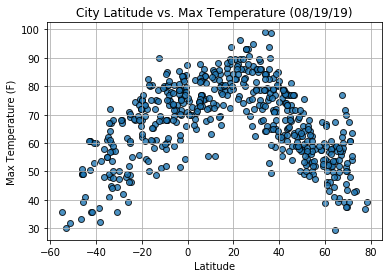

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

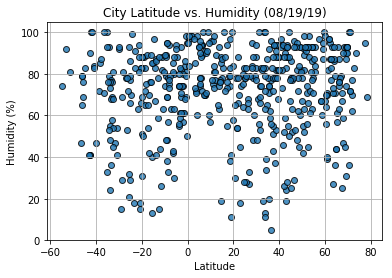

In [7]:
# Build the scatter plots for latitude vs. humidity plot
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

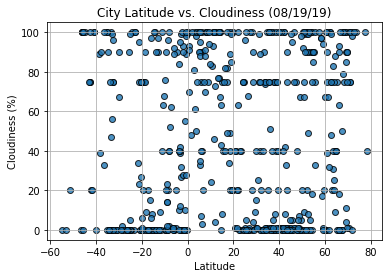

In [8]:
# Build the scatter plots for latitude vs. cloudiness plot
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

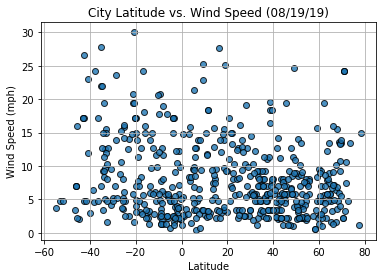

In [9]:
# Build the scatter plots for latitude vs. wind speed plot
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()
